In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("historicos/bitcoin_modificado.csv")
df

,Symbol,Date,High,Low,Open,Close
0,BTC,2013-04-29,147.49,134.00,134.44,144.54
1,BTC,2013-04-30,146.93,134.05,144.00,139.00
2,BTC,2013-05-01,139.89,107.72,139.00,116.99
3,BTC,2013-05-02,125.60,92.28,116.38,105.21
4,BTC,2013-05-03,108.13,79.10,106.25,97.75
...,...,...,...,...,...,...
3168,BTC,2021-12-29,48149.58,46094.02,47542.20,46471.24
3169,BTC,2021-12-30,47926.15,45938.44,46471.24,47122.08
3170,BTC,2021-12-31,48574.70,45650.00,47122.09,46211.24
3171,BTC,2022-01-01,47967.12,46205.00,46211.24,47733.43


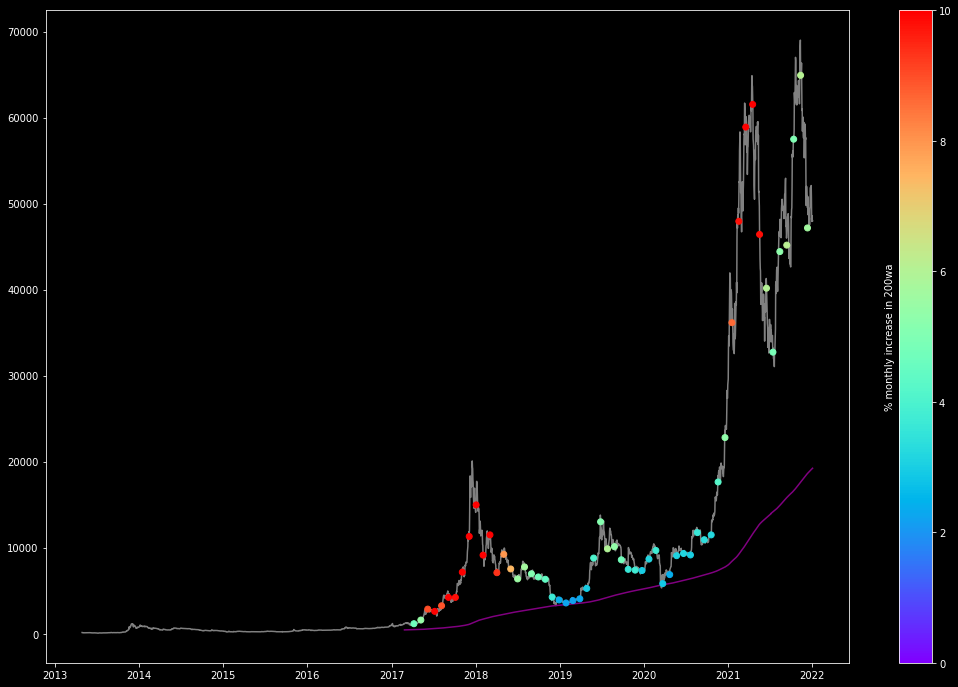

In [42]:
df['200w_moving_average'] = df['High'].rolling(window = 1400).mean()

dates = pd.to_datetime(df['Date'])
plt.rcParams['figure.figsize'] = [18, 12]
# plt.style.use("dark_background")
monthly = df[::30]
distance = monthly['200w_moving_average'].pct_change() * 100
# plt.semilogy(dates, df['High'], color="gray", zorder=1);
# plt.semilogy(dates, df['200w_moving_average'], color="purple", zorder=2);

plt.plot(dates, df['High'], color="gray", zorder=1);
plt.plot(dates, df['200w_moving_average'], color="purple", zorder=2);
plt.scatter(monthly['Date'], monthly['Open'], c=distance, cmap='rainbow', vmin=0, vmax=10, zorder=3)

cbar = plt.colorbar()
cbar.set_label("% monthly increase in 200wa")
cbar.ax.yaxis.set_label_position("left")

In [18]:
df

,Symbol,Date,High,Low,Open,Close,200w_moving_average
0,BTC,2013-04-29,147.49,134.00,134.44,144.54,NaN
1,BTC,2013-04-30,146.93,134.05,144.00,139.00,NaN
2,BTC,2013-05-01,139.89,107.72,139.00,116.99,NaN
3,BTC,2013-05-02,125.60,92.28,116.38,105.21,NaN
4,BTC,2013-05-03,108.13,79.10,106.25,97.75,NaN
...,...,...,...,...,...,...,...
3168,BTC,2021-12-29,48149.58,46094.02,47542.20,46471.24,21038.110833
3169,BTC,2021-12-30,47926.15,45938.44,46471.24,47122.08,21072.675575
3170,BTC,2021-12-31,48574.70,45650.00,47122.09,46211.24,21107.713442
3171,BTC,2022-01-01,47967.12,46205.00,46211.24,47733.43,21142.024100


In [19]:
df['variacion_diaria'] = (df['High'] - df['Low']) / df['Low'] * 100
df

,Symbol,Date,High,Low,Open,Close,200w_moving_average,variacion_diaria
0,BTC,2013-04-29,147.49,134.00,134.44,144.54,NaN,10.067164
1,BTC,2013-04-30,146.93,134.05,144.00,139.00,NaN,9.608355
2,BTC,2013-05-01,139.89,107.72,139.00,116.99,NaN,29.864463
3,BTC,2013-05-02,125.60,92.28,116.38,105.21,NaN,36.107499
4,BTC,2013-05-03,108.13,79.10,106.25,97.75,NaN,36.700379
...,...,...,...,...,...,...,...,...
3168,BTC,2021-12-29,48149.58,46094.02,47542.20,46471.24,21038.110833,4.459494
3169,BTC,2021-12-30,47926.15,45938.44,46471.24,47122.08,21072.675575,4.326899
3170,BTC,2021-12-31,48574.70,45650.00,47122.09,46211.24,21107.713442,6.406791
3171,BTC,2022-01-01,47967.12,46205.00,46211.24,47733.43,21142.024100,3.813700


In [22]:
df.apply(lambda row: (row.Close - row.Open) / row.Open * 100, axis=1)

0        7.512645
1       -3.472222
2      -15.834532
3       -9.597869
4       -8.000000
          ...    
3168    -2.252651
3169     1.400522
3170    -1.932958
3171     3.293982
3172    -0.946884
Length: 3173, dtype: float64

In [24]:
df['variacion_diaria'] = df.apply(lambda row: (row.Close - row.Open) / row.Open * 100, axis=1)
df

,Symbol,Date,High,Low,Open,Close,200w_moving_average,variacion_diaria
0,BTC,2013-04-29,147.49,134.00,134.44,144.54,NaN,7.512645
1,BTC,2013-04-30,146.93,134.05,144.00,139.00,NaN,-3.472222
2,BTC,2013-05-01,139.89,107.72,139.00,116.99,NaN,-15.834532
3,BTC,2013-05-02,125.60,92.28,116.38,105.21,NaN,-9.597869
4,BTC,2013-05-03,108.13,79.10,106.25,97.75,NaN,-8.000000
...,...,...,...,...,...,...,...,...
3168,BTC,2021-12-29,48149.58,46094.02,47542.20,46471.24,21038.110833,-2.252651
3169,BTC,2021-12-30,47926.15,45938.44,46471.24,47122.08,21072.675575,1.400522
3170,BTC,2021-12-31,48574.70,45650.00,47122.09,46211.24,21107.713442,-1.932958
3171,BTC,2022-01-01,47967.12,46205.00,46211.24,47733.43,21142.024100,3.293982


<AxesSubplot:>

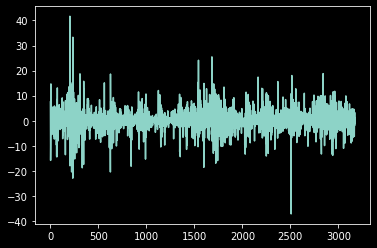

In [25]:
df['variacion_diaria'].plot()

In [45]:
for i in distance:
    print(i)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4.681463518909812
5.450899395747677
9.019252689138412
9.982037694274993
8.944908085519842
13.212946987277242
9.815094747299424
13.134071768350552
17.828465347619414
30.95193427129177
18.91536613086442
12.057329329327304
9.357453991402064
7.963158903142542
7.442651616009854
5.556658481786858
5.726740561837862
5.080698897792368
4.750673020594687
4.446286701103319
3.678151622147263
2.3895600744967105
2.2704878756839575
2.1992392951673656
2.3189572320079233
2.986524078880315
4.053162240891761
5.119794544067857
5.946037066160459
5.37032315747632
4.750281037177939
3.622933591244837
3.771498859051836
3.00687793441321
3.172980939743808
3.718036964639171
2.856774690140762
2.3912989432969933
3.0963700213357592
3.202504389399774
3.0089082053727623
3.623109423829729
3.381786756010663
3.2180901514311966
4.2038

In [ ]:
adfasdfasdfddddd dfasdfa